In [1]:
import sys
sys.path.append("../../dse")

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from plotting import format_plot, save_plot

In [3]:
R = 191

def rho(T, p):
    # rho in kg/m^3
    return p / (R * T)

In [4]:
h = np.arange(0, 51, 5)
h

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

In [5]:
T_min = np.array([145, 143, 139, 134, 130, 126, 123, 123, 131, 121, 120])
T_max = np.array([275, 270, 255, 245, 240, 236, 232, 235, 237, 233, 221])
T_max_storm = np.array([284, 288, 276, 264, 256, 252, 260, 258, 251, 247, 244])

In [6]:
rho_min = np.array([1.1e-2, 7.5e-3, 4.4e-3, 2.3e-3, 1.2e-3, 5.8e-4, 2.8e-4, 1.3e-4, 6.5e-5, 3.3e-5, 1.8e-5])
rho_min_storm = np.array([1e-2, 6.6e-3, 4.9e-3, 2.3e-3, 1.1e-3, 5.6e-4, 2.8e-4, 1.5e-4, 8.6e-5, 5.1e-5, 3.1e-5])
rho_max = np.array([2.1e-2, 1.2e-2, 6.7e-3, 4e-3, 2.4e-3, 1.4e-3, 8e-4, 4.7e-4, 2.6e-4, 1.3e-4, 6.9e-5])

Max T: perihelion (Ls 251), solar maximum, dust storm, global maximum (summer pole at local 15:00)

Min T: aphelion (Ls = 71), solar minimum, clear sky, global minimum (winter pole at local 05:00)

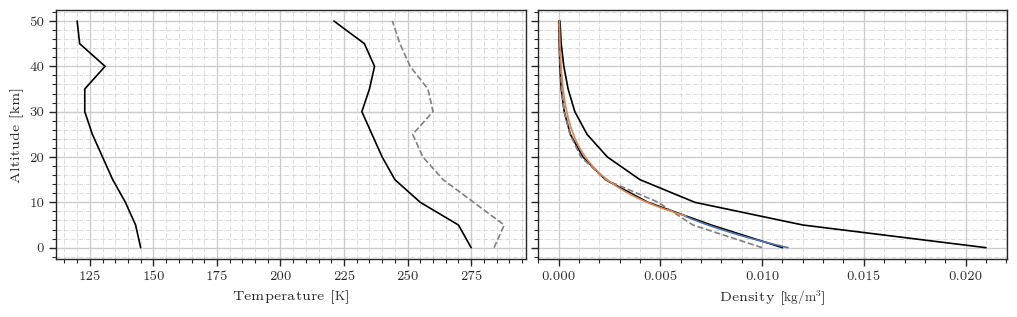

In [28]:
def plot_atmosphere():
    fig, (ax_T, ax_rho) = plt.subplots(1, 2, figsize=(10, 3), sharey="all")

    ax_T.plot(T_min, h, c="black")
    ax_T.plot(T_max, h, c="black")
    ax_T.plot(T_max_storm, h, ls="--", c="gray")
    ax_T.set_xlabel("Temperature [$K$]")

    ax_rho.plot(rho_min, h, c="black")
    ax_rho.plot(rho_min_storm, h, ls="--", c="gray")
    ax_rho.plot(rho_max, h, c="black")
    ax_rho.set_xlabel("Density [$kg/m^3$]")

    hh = np.arange(0, 7e3, 20)
    T = -31 - 0.000998 * hh
    p = 0.699 * np.exp(-0.00009 * hh)
    rho = p / (0.1921 * (T+273.1)) * 0.75
    ax_rho.plot(rho, hh / 1e3)

    hh = np.arange(7e3, 50e3, 20)
    T = -23.4 - 0.00222 * hh
    p = 0.699 * np.exp(-0.00013 * hh)
    rho = p / (0.1921 * (T+273.1))
    ax_rho.plot(rho, hh / 1e3)

    ax_T.set_ylabel("Altitude [km]")

    format_plot()
    save_plot(".", "atmosphere")

plot_atmosphere()